In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import cv2
import os

## Product Detection Workbook

## Task

In this competition, a multiple image classification model needs to be built. There are ~100k images within 42 different categories, including essential medical tools like masks, protective suits and thermometers, home & living products like air-conditioner and fashion products like T-shirts, rings, etc. For the data security purpose the category names will be desensitized. The evaluation metrics is top-1 accuracy.

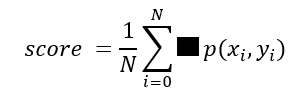

Where
- N is number of test samples.
- xi is the predicted category for i th test sample.
- yi is the ground truth for i th test sample.
- p(xi,yi) is calculated as 1 if xi=yi and 0 otherwise.
A higher score is better. In your practice you need to find a proper threshold to predict category name(string) instead of probabilities.

Submission File
Submission file format should be `csv` file only. And for each `filename` in the test dataset, you must predict only one proper category name.


## Solution Steps

## Data Processing

Since the data was from real word use cases, inspection needed to be done to ensure that the data is free from noise and losses. As such, typical pre-processing techniques would be use to de-noise the images dataset. A candidate for this would be to apply Gaussian smoothing to the image dataset.

Libraries for such functions would be OpenCV.

Quick inspection of the image dataset shows that the images are not in the same sizes, thus preprocessing has to be done to resize the images into a standardise size format. 

The following article outlines how we can choose the right image size for our image classification model.
https://towardsdatascience.com/boost-your-cnn-image-classifier-performance-with-progressive-resizing-in-keras-a7d96da06e20

Ideally, from this we can obtained a processed dataset from where a image classification model can be built from. In this case, we would be using a convolutional neural network to be trained on the dataset for prediction on the test dataset.

Image generator idea in keras & tensorflow could help with loading such large datasets which cannot fit in local memory.
https://machinelearningmastery.com/how-to-load-large-datasets-from-directories-for-deep-learning-with-keras/
https://www.tensorflow.org/guide/data

In [2]:
# Reading in raw test and training CSVs
trainDF = pd.read_csv("train.csv")
testDF = pd.read_csv("test.csv")

In [3]:
trainDF.sort_values(by=["category", 'filename'], inplace=True)

In [4]:
trainDF.head()

,filename,category
55380,00b32bd5ba9cdd7c2f11e3975b3e54fa.jpg,0
54316,00df3dd83ad6845e6fdfe675d755e17f.jpg,0
55035,00df7aa7afaa7c512b9a317adb0aae24.jpg,0
53410,00e6066eb828dcbe1755a4dabe189c06.jpg,0
54273,012c3848585c70f971a1621bae6c8410.jpg,0


In [5]:
# File paths to image data
DATADIR = "train//train"
CATEGORIES_INT = trainDF['category'].unique().tolist()
CATEGORIES = ["{:02d}".format((i)) for i in CATEGORIES_INT]

In [7]:
training_data = []
# Reading in image data
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) # path to classifier directory
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                training_data.append([img_array, class_num])
            except Exception as e:
                pass
        break

create_training_data()

In [8]:
print(len(training_data))

2683
